In [32]:
from simuPark.park import SalitrePark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

park = SalitrePark(
    fn = fn,
    fastpass_pool_size=0.13,
)

park.start_day(max_entry_rate=95000/960, wait_time_update=5)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:22<00:00, 42.45it/s]


39139
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


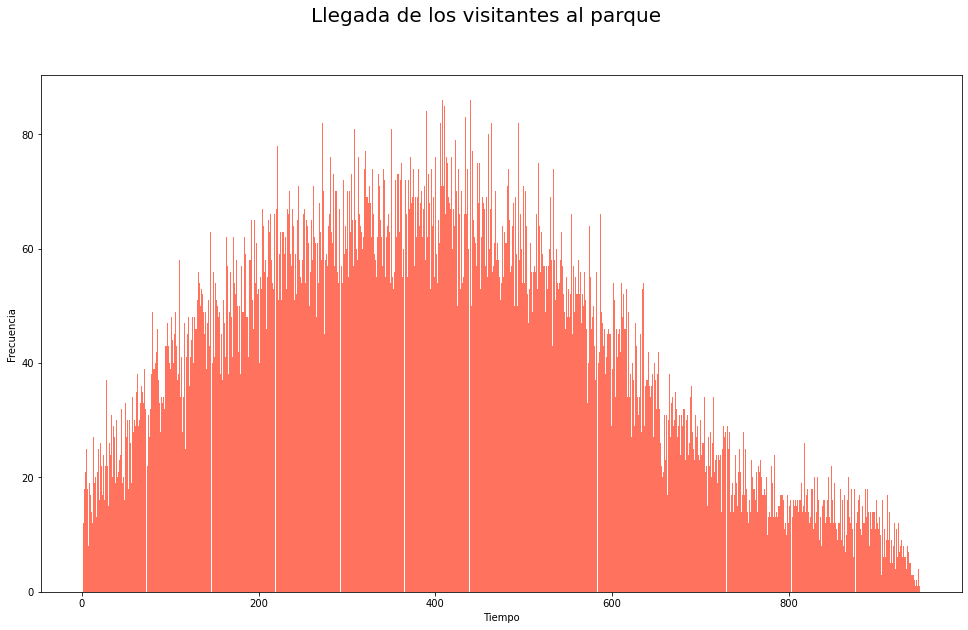

In [33]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [34]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass?',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
# guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass?,fastpass_used,total_wait_time,average_wait_time
0,Relaxed Visitor,1,254,253,25,1,True,1,8,8.0
1,Tourist,1,428,427,60,1,True,1,41,41.0
2,Average,1,391,390,50,1,True,1,1,1.0
3,Average,1,406,405,50,3,True,3,48,16.0
4,Average,1,294,293,50,0,True,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
39134,All Day Park,947,960,13,40,0,True,0,0,0.0
39135,Relaxed Visitor,947,960,13,25,0,False,0,0,0.0
39136,Activity Enjoyer,947,960,13,10,0,True,0,0,0.0
39137,Relaxed Visitor,947,960,13,25,0,True,0,0,0.0


Atracciones experimentadas promedio: 2.6449066148854086
Atracciones experimentadas desviación estandar: 3.6868494809755616


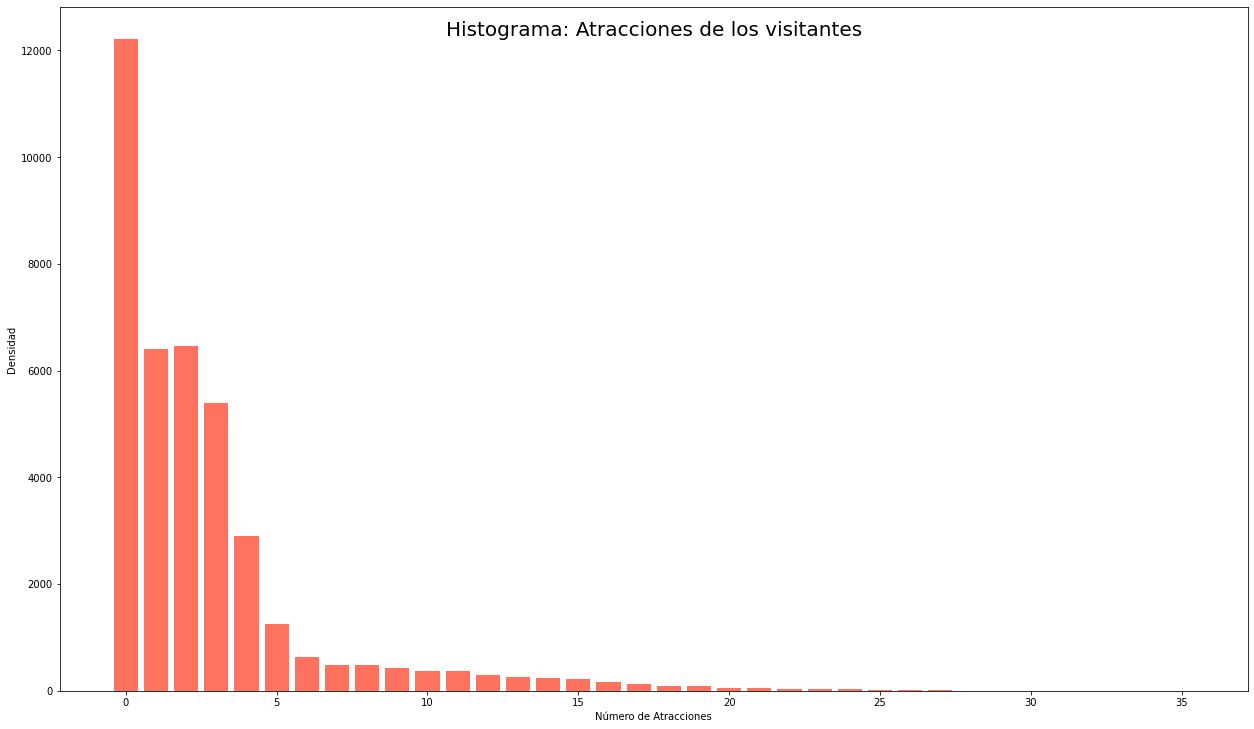

In [35]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

50.40705761899292
(49.959955041806325, 50.85416019617952)
26932
216.0


Text(0, 0.5, 'Densidad')

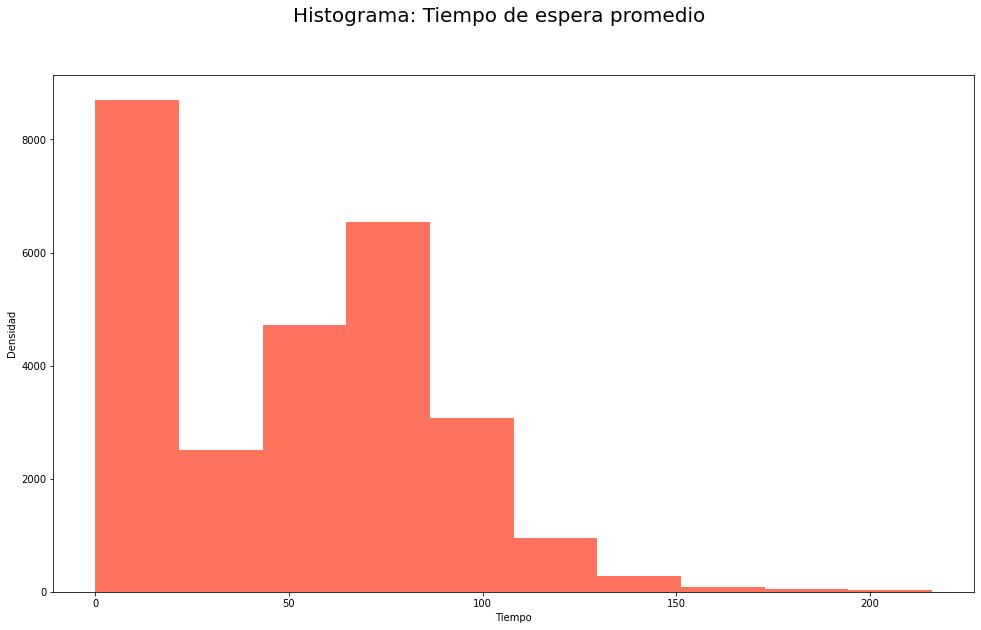

In [36]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)


print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime,  color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [37]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,45
3,Kali River Rapids,5
4,Kilimanjaro Safaris,40
5,Na'vi River Journey,35
6,TriceraTop Spin,0


In [38]:
attr_alt_wait_time = [[attr.name, attr.alt_queue.top_wait_time] for attr in park.attractions]
attr_df_alt = pd.DataFrame(attr_alt_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df_alt

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,40
3,Kali River Rapids,5
4,Kilimanjaro Safaris,35
5,Na'vi River Journey,35
6,TriceraTop Spin,0


In [39]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()



id: 1702  arvTime: 71 things_done: ['Kilimanjaro Safaris', 'Flight of Passage', 'Expedition Everest', "Na'vi River Journey", "Na'vi River Journey", "Na'vi River Journey", 'Expedition Everest', 'Kali River Rapids', 'Kilimanjaro Safaris', 'DINOSAUR', 'Expedition Everest', 'Expedition Everest', "Na'vi River Journey", 'Flight of Passage', 'DINOSAUR', 'Kilimanjaro Safaris', "Na'vi River Journey", 'DINOSAUR', 'Flight of Passage', 'Flight of Passage', 'Expedition Everest', 'Kali River Rapids', 'Kali River Rapids', 'DINOSAUR', 'Kali River Rapids', 'Flight of Passage', 'Kali River Rapids', "Na'vi River Journey", "Na'vi River Journey", "Na'vi River Journey", 'Flight of Passage', 'Expedition Everest', 'Kilimanjaro Safaris', 'Kilimanjaro Safaris', 'Flight of Passage'] attrExp: 35
queues_joined: 35 total_wait_time: 153 archetype: Attraction Enjoyer
fastpass? False


In [40]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()

park.attractions[0].queue.max_in_queue


id: 35987  arvTime: 725 things_done: ['Flight of Passage'] attrExp: 1
queues_joined: 2 total_wait_time: 216 archetype: Attraction Enjoyer
fastpass? True


26

In [41]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

12207